# Music Classification

### Upload data to colab

In [1]:
# from google.colab import files
# files.upload()  # upload features_3_sec.csv
# files.upload()  # upload features_30_sec.csv

### Import Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import torch.nn as nn

### Data read in & Preprocess

In [4]:
df30 = pd.read_csv("features_30_sec.csv")
df30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
df3 = pd.read_csv("features_3_sec.csv")
df3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
class_list=df30.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_list)

In [8]:
fit=StandardScaler()
filename3 = df3.iloc[:,0].values
feature3=fit.fit_transform(np.array(df3.iloc[:,1:-1],dtype=float))
filename30 = df30.iloc[:,0].values
feature30=fit.fit_transform(np.array(df30.iloc[:,1:-1],dtype=float))
map = dict()
for name, feature in zip(filename3, feature3):
    map[name] = feature
for name, feature in zip(filename30, feature30):
    map[name] = feature

In [9]:
filename30 = df30.iloc[:,0]
filename_train,filename_test,y_train,y_test=train_test_split(filename30,y,test_size=0.33)

In [10]:
import numpy as np

unique_elements, counts = np.unique(y_train, return_counts=True)
proportions = counts / len(y_train)

for element, proportion in zip(unique_elements, proportions):
    # round to 2 decimal places and convert to percentage
    proportion = round(proportion * 100, 2)
    print(f"Label {element}: Proportion {proportion}%")


print(filename_train.shape)
print(filename_test.shape)
print(y_train.shape)
print(y_test.shape)

Label 0: Proportion 10.6%
Label 1: Proportion 10.0%
Label 2: Proportion 10.45%
Label 3: Proportion 9.85%
Label 4: Proportion 9.55%
Label 5: Proportion 10.75%
Label 6: Proportion 9.1%
Label 7: Proportion 9.85%
Label 8: Proportion 10.6%
Label 9: Proportion 9.25%
(670,)
(330,)
(670,)
(330,)


In [11]:
# Check if GPU is available
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

### Build the model

In [209]:
class model_3s(nn.Module):
    def __init__(self, input_size, hidden_sizes,output_size, dropout_prob=0.3):
        super(model_3s, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_sizes = [input_size] + hidden_sizes
        for i in range(1, len(self.hidden_sizes)):
            self.hidden_layers.append(nn.Sequential(
                nn.Linear(self.hidden_sizes[i-1], self.hidden_sizes[i]),
                nn.ReLU(),
                nn.Dropout(dropout_prob)
            ))

    def forward(self, x):
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
        return x


class WeightedConcatenateModule(nn.Module):
    def __init__(self, num_vectors, dropout_prob=0.4):
        super(WeightedConcatenateModule, self).__init__()
        self.dropout = nn.Dropout(dropout_prob)
        self.weights = nn.Parameter(torch.zeros(num_vectors, 1))

    def forward(self, vectors):
        vectors = [self.dropout(v) for v in vectors]
        weighted_vectors = [w * v for w, v in zip(self.weights, vectors)]
        concatenated_vector = torch.cat(weighted_vectors, dim=1)
        return concatenated_vector


class model_30s(nn.Module):
    def __init__(self, input_size, hidden_sizes, hidden_sizes2, output_size, dropout_prob=0.3, slice_num=10):
        super(model_30s, self).__init__()
        self.sub_models = [model_3s(input_size, hidden_sizes, dropout_prob).to(device) for _ in range(slice_num)]
        self.concatenate_module = WeightedConcatenateModule(slice_num)
        self.hidden_layers = nn.ModuleList()
        self.hidden_sizes2 = [hidden_sizes[-1] * slice_num] + hidden_sizes2
        for i in range(1, len(self.hidden_sizes2)):
            self.hidden_layers.append(nn.Sequential(
                nn.Linear(self.hidden_sizes2[i-1], self.hidden_sizes2[i]),
                nn.ReLU(),
                nn.Dropout(dropout_prob)
            ))
        self.output_layer = nn.Linear(hidden_sizes2[-1], output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, slices_x):
        mid_outputs = []
        for i, x in enumerate(slices_x):
            x = self.sub_models[i](x)
            mid_outputs.append(x)
        x = self.concatenate_module(mid_outputs)
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
        x = self.output_layer(x)
        x = self.softmax(x)
        return x


input_size = 58
hidden_sizes = [512]
hidden_sizes2 = [512]
output_size = 10
dropout_prob = 0.2

model = model_30s(input_size, hidden_sizes, hidden_sizes2, output_size, dropout_prob)


### Train

In [210]:
train_x = [[]] * 10
for i in range(10):
    train_slice = []
    for j in range(filename_train.shape[0]):
        file_name = filename_train.iloc[j].split('.')
        file_id = file_name[1]
        file_name[1] = file_id + "." + str(i)
        filename = ".".join(file_name)
        row = map[filename] if filename in map else train_x[0][j]
        train_slice.append(row)
    train_x[i] = np.vstack(tuple(train_slice))
train_x = np.array(train_x)
train_x = torch.tensor(train_x, dtype=torch.float32).to(device)
train_y = torch.tensor(y_train, dtype=torch.long).to(device)


test_x = [[]] * 10
for i in range(10):
    test_slice = []
    for j in range(filename_test.shape[0]):

        file_name = filename_test.iloc[j].split('.')
        file_id = file_name[1]
        file_name[1] = file_id + "." + str(i)
        filename = ".".join(file_name)
        row = map[filename] if filename in map else test_x[0][j]
        test_slice.append(row)
    test_x[i] = np.vstack(tuple(test_slice))
test_x = np.array(test_x)
test_x = torch.tensor(test_x, dtype=torch.float32).to(device)
test_y = torch.tensor(y_test, dtype=torch.long).to(device)

model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move your network and any necessary inputs to the GPU

train_loss_log = []
val_loss_log = []

patience = 40  # Number of epochs to wait for improvement before stopping
best_val_loss = float('inf')  # Initialize best validation loss
patience_counter = 0  # Counter to keep track of the number of epochs without improvement

model.train()

# Train the model
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(train_x)
    loss = criterion(y_pred, train_y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        accuracy = torch.sum(torch.argmax(y_pred, dim=1) == train_y).item() / len(y_train)
        val_accuracy = torch.sum(torch.argmax(model(test_x), dim=1) == test_y).item() / len(y_test)
        val_loss = criterion(model(test_x), test_y)
        train_loss_log.append(loss.item())
        val_loss_log.append(val_loss.item())
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Accuracy: {accuracy}, Val loss: {val_loss.item()}, Val Accuracy: {val_accuracy}")

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter > patience:
                print("Early stopping")
                break

Epoch 10, Loss: 2.295954704284668, Accuracy: 0.3970149253731343, Val loss: 2.295105457305908, Val Accuracy: 0.3696969696969697
Epoch 20, Loss: 2.225024461746216, Accuracy: 0.408955223880597, Val loss: 2.2195308208465576, Val Accuracy: 0.3939393939393939
Epoch 30, Loss: 2.0605571269989014, Accuracy: 0.4059701492537313, Val loss: 2.0637640953063965, Val Accuracy: 0.4090909090909091
Epoch 40, Loss: 1.9448761940002441, Accuracy: 0.573134328358209, Val loss: 1.9943596124649048, Val Accuracy: 0.48484848484848486
Epoch 50, Loss: 1.8754647970199585, Accuracy: 0.6074626865671642, Val loss: 1.9458969831466675, Val Accuracy: 0.5333333333333333
Epoch 60, Loss: 1.81265127658844, Accuracy: 0.682089552238806, Val loss: 1.9302337169647217, Val Accuracy: 0.5606060606060606
Epoch 70, Loss: 1.7605739831924438, Accuracy: 0.7328358208955223, Val loss: 1.8931324481964111, Val Accuracy: 0.5818181818181818
Epoch 80, Loss: 1.7244484424591064, Accuracy: 0.7656716417910447, Val loss: 1.8639845848083496, Val Accu

### Result

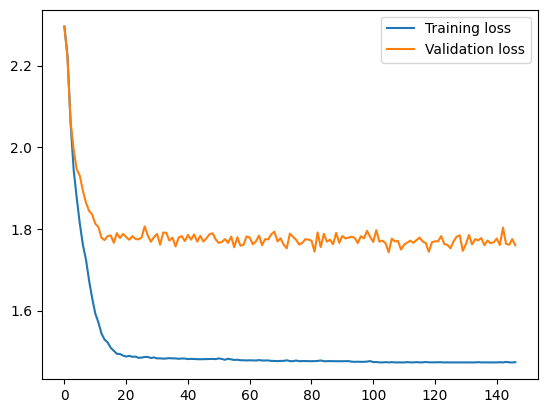

In [211]:
# plot the training and validation loss
plt.plot(train_loss_log, label='Training loss')
plt.plot(val_loss_log, label='Validation loss')
plt.legend()
plt.show()

### Evaluation

In [212]:
# 4 metrics to measure the performance in test set
print(classification_report(test_y.detach().cpu().numpy(), torch.argmax(model(test_x), dim=1).detach().cpu().numpy()))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        29
           1       0.86      0.94      0.90        33
           2       0.58      0.70      0.64        30
           3       0.56      0.59      0.57        34
           4       0.86      0.67      0.75        36
           5       0.83      0.86      0.84        28
           6       0.84      0.82      0.83        39
           7       0.86      0.71      0.77        34
           8       0.61      0.69      0.65        29
           9       0.54      0.50      0.52        38

    accuracy                           0.71       330
   macro avg       0.72      0.72      0.71       330
weighted avg       0.72      0.71      0.71       330

